In [1]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

     |████████████████████████████████| 53 kB 1.4 MB/s 
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-2hsdokny
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-2hsdokny
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369389 sha256=5cf4e1072753a496b7c6682e9c62aa5dd4a8e600611718983b80017c60db5832
  Stored in directory: /tmp/pip-ephem-wheel-cache-0kk75re0/wheels/fd/b9/c3/5b4470e35ed76e174bff77c92f91da82098d5e35fd5bc8cdac
Successfully built clip


In [2]:
import os
import numpy as np
import torch
import clip
import cv2
from PIL import Image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Class = ["Buffalo", "Elephant", "Rhino","Zebra","cat","chicken","cow","dog","horse","sheep"]
Class_dic = {1:"Buffalo", 2:"Elephant", 3:"Rhino", 4:"Zebra", 5:"cat", 6:"chicken", 7:"cow", 8:"dog", 9:"horse", 10:"sheep"}

In [6]:
image_labels = []
image_file = []
path = "/content/drive/MyDrive/Transformer_CLIP/Data_10"


for i in Class:
    paths = path + '/' + i
    images = os.listdir(paths)

    for img in images:
        
        try:
            image_file.append(paths + '/' + img)
            image_labels.append(i)
        except:
            print("Error in " + img)

print(len(image_file))

19936


In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
predict = []
count = 0
for i in image_file:
  count += 1
  if (count % 100 == 0):
    print ("image processes: " + str(count) + str("/") + str(len(image_file)))
    
  image = preprocess(Image.open(i)).unsqueeze(0).to(device)
  text = clip.tokenize(["Buffalo", "Elephant", "Rhino","Zebra","cat","chicken","cow","dog","horse","sheep"]).to(device)

  with torch.no_grad():
      image_features = model.encode_image(image)
      text_features = model.encode_text(text)
      
      logits_per_image, logits_per_text = model(image, text)
      probs = logits_per_image.softmax(dim=-1).cpu().numpy()
  
  res = 0
  pos = -1
  for j in range(len(probs[0])):
    if probs[0][j] > res:
      res = probs[0][j]
      pos = j + 1
  predict.append(Class_dic[pos])
print(predict)

image processes: 100/19936
image processes: 200/19936
image processes: 300/19936
image processes: 400/19936
image processes: 500/19936
image processes: 600/19936
image processes: 700/19936
image processes: 800/19936
image processes: 900/19936
image processes: 1000/19936
image processes: 1100/19936
image processes: 1200/19936
image processes: 1300/19936
image processes: 1400/19936
image processes: 1500/19936
image processes: 1600/19936
image processes: 1700/19936
image processes: 1800/19936
image processes: 1900/19936
image processes: 2000/19936
image processes: 2100/19936
image processes: 2200/19936
image processes: 2300/19936
image processes: 2400/19936
image processes: 2500/19936
image processes: 2600/19936
image processes: 2700/19936
image processes: 2800/19936
image processes: 2900/19936
image processes: 3000/19936
image processes: 3100/19936
image processes: 3200/19936
image processes: 3300/19936
image processes: 3400/19936
image processes: 3500/19936
image processes: 3600/19936
i

In [8]:
import sklearn
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
print(f"Accuracy is {sklearn.metrics.accuracy_score(predict, image_labels)}")

Accuracy is 0.959169341894061


In [10]:
confusion_mat = confusion_matrix(y_true = image_labels, y_pred = predict, labels=Class)

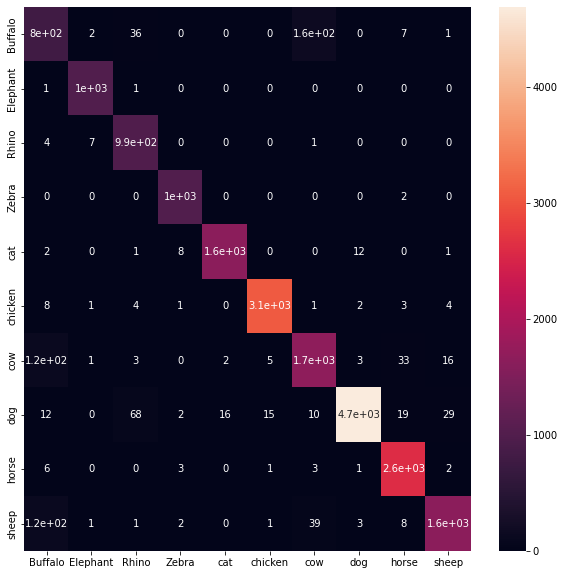

In [11]:
df_cm = pd.DataFrame(confusion_mat, index = Class,columns = Class)
plt.rcParams['figure.figsize'] = (10,10)
sns.heatmap(df_cm, annot=True)